In [1]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
json_dir = 'Z:\\SAI\\data\\IR'

In [7]:
def create_gaze_heatmap(gaze_angles, save_path=None):
    # Extract pitch and yaw angles
    pitch = [angle[0] for angle in gaze_angles]
    yaw = [angle[1] for angle in gaze_angles]
    
    # Define bins
    pitch_bins = np.linspace(-90, 90, 19)
    yaw_bins = np.linspace(-90, 90, 19)

    # Create 2D histogram
    heatmap, xedges, yedges = np.histogram2d(pitch, yaw, bins=[pitch_bins, yaw_bins])
    
    # print(heatmap)

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap.T, origin='lower', extent=[-90, 90, -90, 90], cmap='Reds')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('gaze_angle Heatmap')
    plt.colorbar(label='Frequency')
    # Add text annotations for each cell
    for i in range(len(xedges) - 1):
        for j in range(len(yedges) - 1):
            plt.text(xedges[i] + 0.5 * (xedges[i + 1] - xedges[i]), 
                     yedges[j] + 0.5 * (yedges[j + 1] - yedges[j]), 
                     str(int(heatmap[i, j])), 
                     color='black', ha='center', va='center')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    
    plt.show()

In [8]:
def create_headpose_heatmap(gaze_angles, save_path=None):
    # Extract pitch and yaw angles
    x = [angle[0] for angle in gaze_angles]
    y = [angle[1] for angle in gaze_angles]
    
    # Define bins
    pitch_bins = np.linspace(-90, 90, 19)
    yaw_bins = np.linspace(-90, 90, 19)

    # Create 2D histogram
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[pitch_bins, yaw_bins])
    
    # print(heatmap)

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap.T, origin='lower', extent=[-90, 90, -90, 90], cmap='Reds')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('head_angle Heatmap')
    plt.colorbar(label='Frequency')
    # Add text annotations for each cell
    for i in range(len(xedges) - 1):
        for j in range(len(yedges) - 1):
            plt.text(xedges[i] + 0.5 * (xedges[i + 1] - xedges[i]), 
                     yedges[j] + 0.5 * (yedges[j + 1] - yedges[j]), 
                     str(int(heatmap[i, j])), 
                     color='black', ha='center', va='center')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    
    plt.show()

In [16]:
head_pitch = []
head_yaw = []
gaze_pitch = []
gaze_yaw = []
spy = []
gpy = []
hpy = []
hpr = []
hry = []

# 디렉토리 내 모든 파일에 대해 반복
for file_id in os.listdir(json_dir):
    file_id_dir = os.path.join(json_dir,file_id)
    for file_case in os.listdir(file_id_dir):
        file_id_dir = os.path.join(json_dir,file_id,file_case)
        for file_name in os.listdir(file_id_dir):
            if file_name.endswith(".json"):
                filepath = os.path.join(json_dir,file_id,file_case, file_name)
                # print(filepath)
                with open(filepath, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    # print(data)
                    # head_turn 데이터 추출
                    facial_attributes = data.get('facial_attributes',{})
                    head_turn = facial_attributes.get('head_turn', {})
                    gaze_angle = facial_attributes.get('gaze', {})

                    # print(head_turn)


                    head_pitch = int(head_turn['pitch'])
                    head_yaw = int(head_turn['yaw'])
                    head_roll = int(head_turn['roll'])
                    gaze_pitch = int(gaze_angle['vertical_angle'])
                    gaze_yaw = int(gaze_angle['horizontal_angle'])

                    # print(pitch,yaw,roll)
                    spy.append((head_pitch+gaze_pitch,head_yaw+gaze_yaw))
                    gpy.append((gaze_pitch,gaze_yaw))
                    hpy.append((head_pitch,head_yaw))
                    hpr.append((head_pitch,head_roll))
                    hry.append((head_roll,head_yaw))

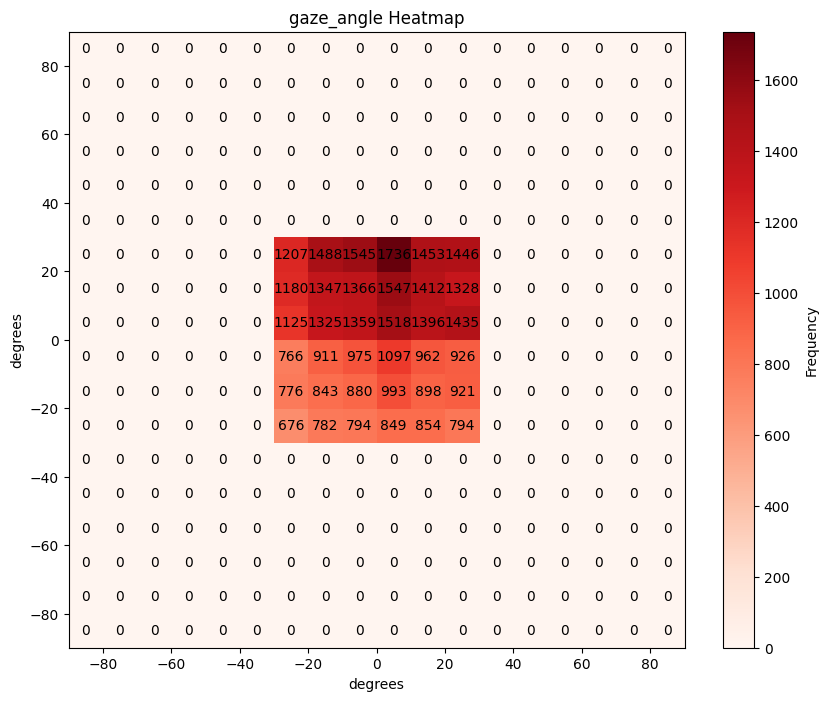

In [17]:
create_gaze_heatmap(gpy,save_path='C:\\lee\\work\\SAI\\save_01.png')

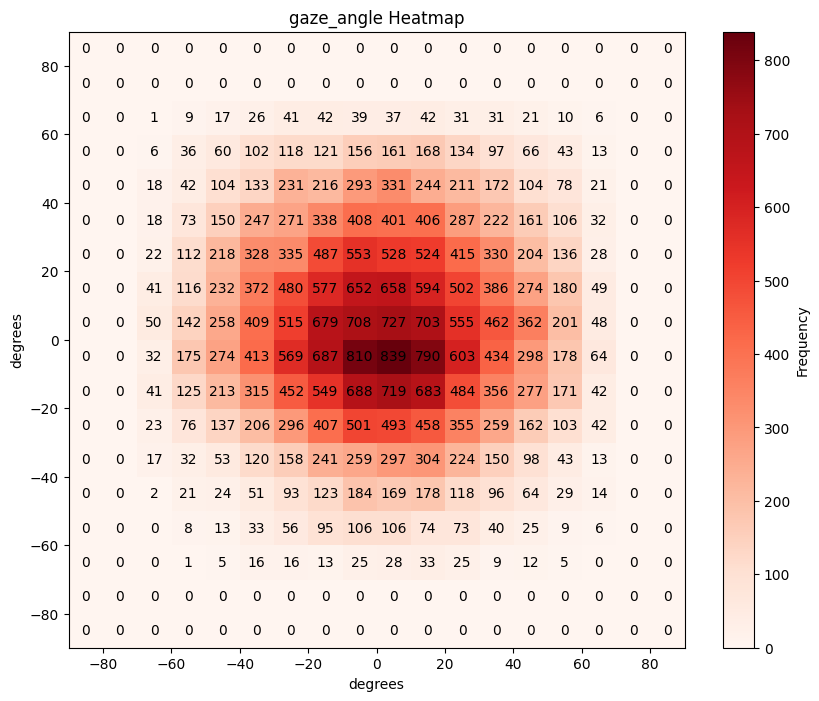

In [18]:
create_gaze_heatmap(spy,save_path='C:\\lee\\work\\SAI\\save_02.png')

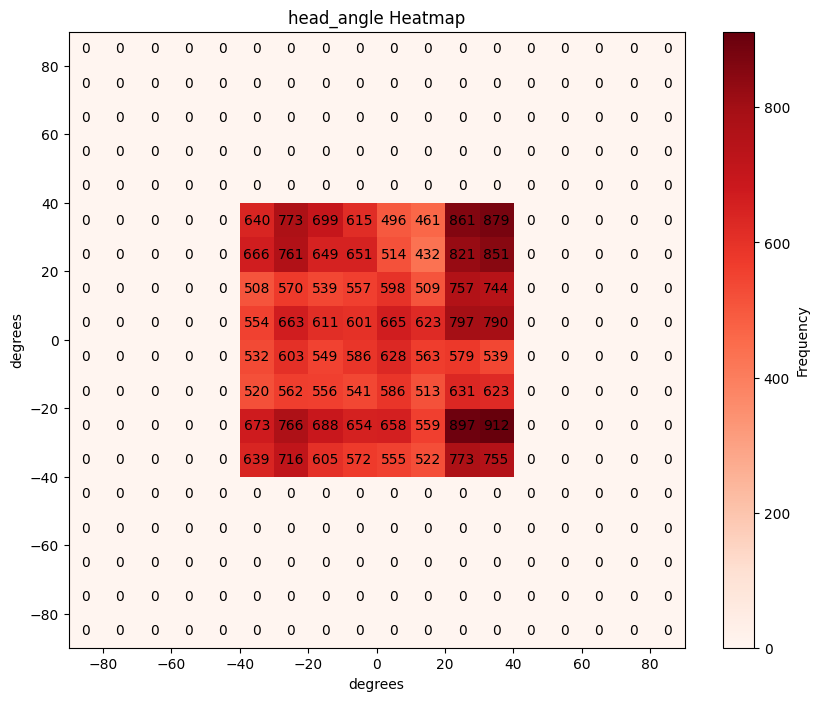

In [19]:
create_headpose_heatmap(hpy,save_path='C:\\lee\\work\\SAI\\save_03.png')

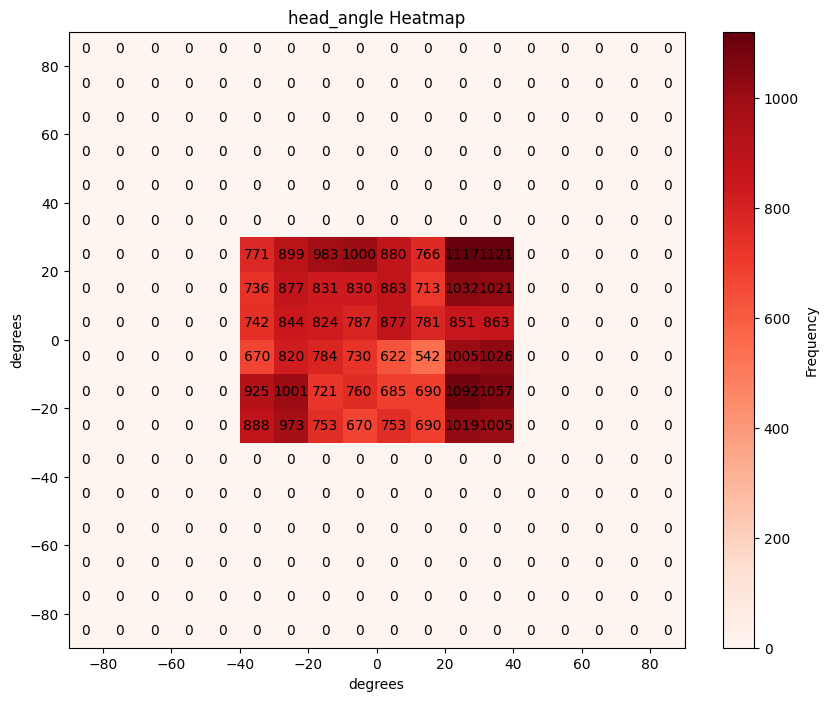

In [20]:
create_headpose_heatmap(hpr,save_path='C:\\lee\\work\\SAI\\save_05.png')

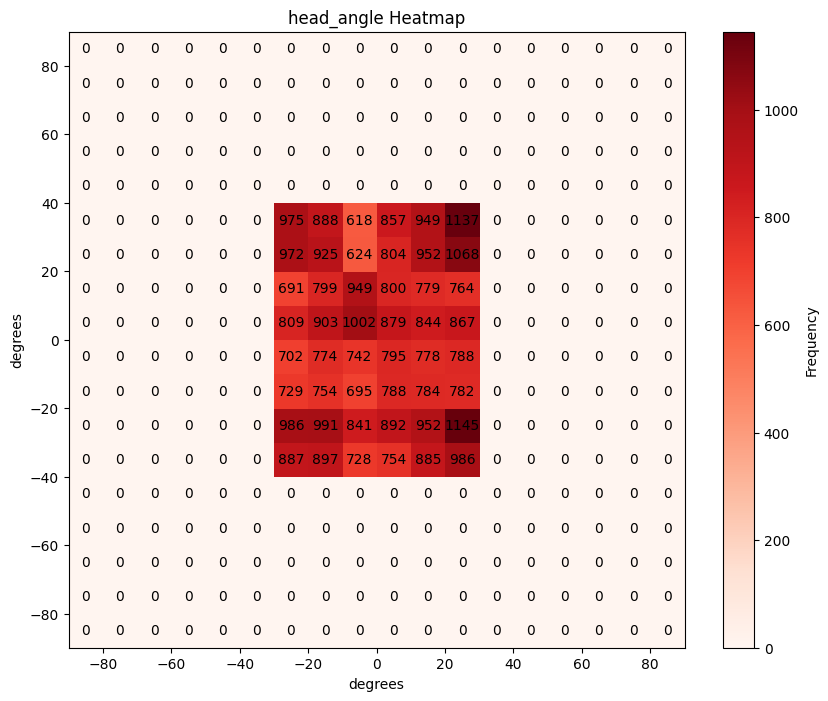

In [21]:
create_headpose_heatmap(hry,save_path='C:\\lee\\work\\SAI\\save_04.png')